## Загрузим нужные библиотеки

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [4]:
!pip3 install missingno
import missingno as msno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Хакатоны/Дагестан ДТП/train_dataset_train (1).csv")

In [6]:
df

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей
0,490103984,13.07.2018,17:35:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,NaN,NaN,NaN,Столкновение,0,0,0,0
1,490097169,11.05.2018,17:10:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,73,NaN,NaN,NaN,Столкновение,0,0,0,0
2,490031781,25.01.2020,14:44:00,"Новгородская область, Великий Новгород",Хутынская ул,29,NaN,NaN,NaN,NaN,0,0,0,0
3,490021246,11.05.2020,11:30:00,"Новгородская область, Новгородский район, Сави...",Вишнёвая ул,4,NaN,NaN,NaN,NaN,0,0,0,0
4,490041585,09.01.2019,01:45:00,"Новгородская область, Окуловский район",NaN,NaN,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Иной вид ДТП,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,490049248,15.05.2019,07:35:00,"Новгородская область, Великий Новгород",NaN,NaN,NaN,NaN,NaN,Столкновение,0,0,0,0
35767,490070258,15.10.2019,08:45:00,"Новгородская область, Великий Новгород",Пестовская ул,1,NaN,NaN,NaN,Столкновение,0,0,0,0
35768,490046086,10.03.2019,09:00:00,"Новгородская область, Старорусский район, Стар...",NaN,NaN,NaN,NaN,NaN,Наезд на стоящее ТС,0,0,0,0
35769,490007163,13.09.2020,05:40:00,"Новгородская область, Новгородский район",NaN,NaN,"""Россия"" Москва - Тверь - Великий Новгород - С...",544.0,870.0,NaN,0,0,0,0


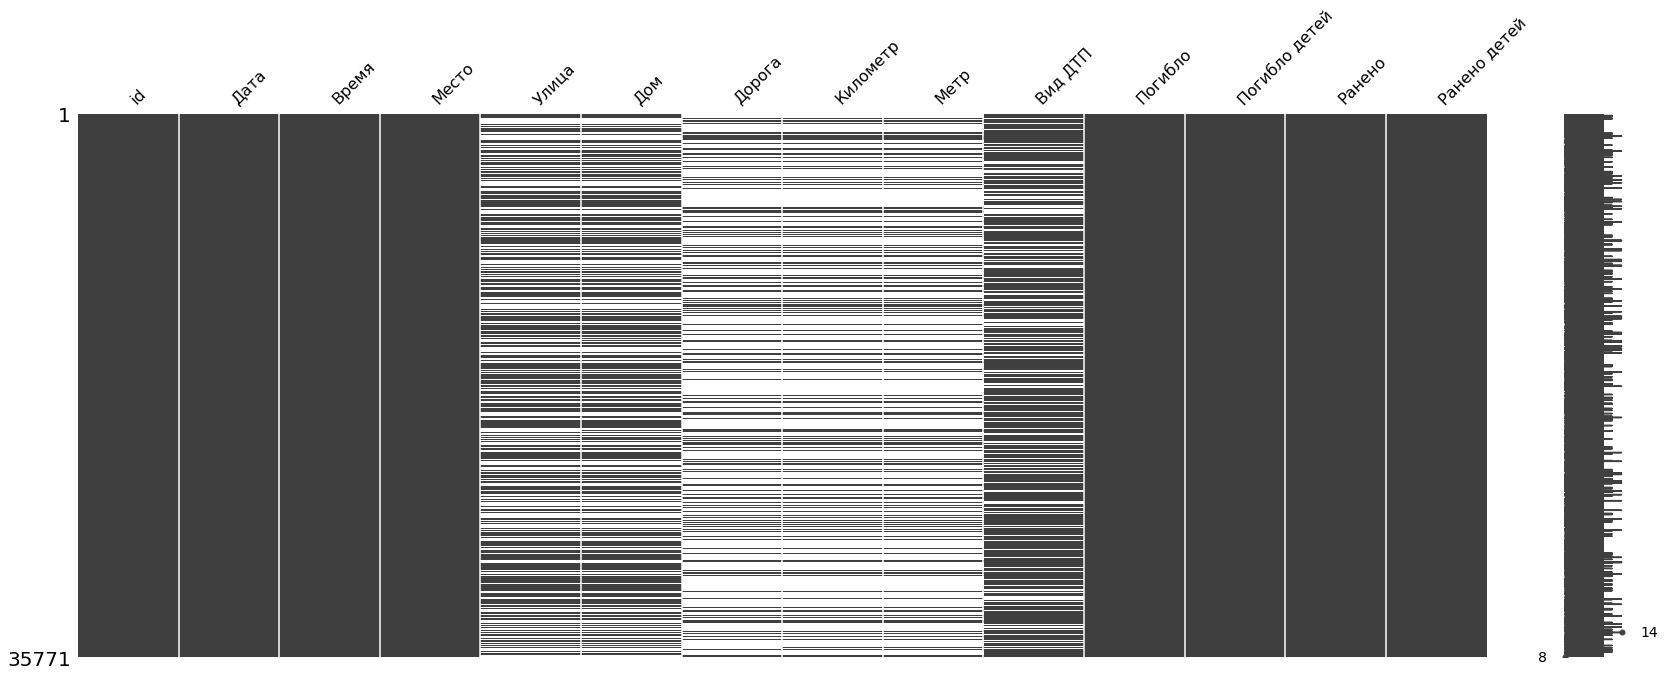

In [7]:
msno.matrix(df, figsize = (28,10))

## Рассмотрим датасет по ближе

In [8]:
df = df.dropna(subset=['Вид ДТП'])
df = df.dropna()

In [9]:
df.head()

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей
1464,490114208,23.10.2018,11:50:00,"Новгородская область, Солецкий район, Сольцы",Новгородская ул,68,Великий Новгород - Сольцы - Порхов - Псков,75.0,800.0,Падение пассажира,0,0,0,0
1486,490111232,17.09.2018,12:30:00,"Новгородская область, Солецкий район, Сольцы",Советский пр-кт,19,Великий Новгород - Сольцы - Порхов - Псков,77.0,0.0,Столкновение,0,0,0,0
2452,490078917,31.01.2018,19:10:00,"Новгородская область, Солецкий район, Сольцы",Новгородская ул,68,Великий Новгород - Сольцы - Порхов - Псков,74.0,0.0,Столкновение,0,0,0,0
4086,490035970,17.02.2019,01:15:00,"Новгородская область, Солецкий район, Сольцы",Новгородская ул,60,Великий Новгород - Сольцы - Порхов - Псков,75.0,0.0,Съезд с дороги,0,0,0,0
4358,490074246,30.11.2019,07:00:00,"Новгородская область, Новгородский район, Ермо...",Центральная ул,25,Великий Новгород - Сырково,0.0,830.0,Наезд на пешехода,0,0,3,0


In [10]:
df.shape

(63, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1464 to 34135
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             63 non-null     int64  
 1   Дата           63 non-null     object 
 2   Время          63 non-null     object 
 3   Место          63 non-null     object 
 4   Улица          63 non-null     object 
 5   Дом            63 non-null     object 
 6   Дорога         63 non-null     object 
 7   Километр       63 non-null     float64
 8   Метр           63 non-null     float64
 9   Вид ДТП        63 non-null     object 
 10  Погибло        63 non-null     int64  
 11  Погибло детей  63 non-null     int64  
 12  Ранено         63 non-null     int64  
 13  Ранено детей   63 non-null     int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 7.4+ KB


Заменим все пропуски в данных

In [12]:
# df = df.fillna(0)

Добавим пару новых столбцов

In [13]:
df["День"] = df["Дата"].str[:2]
df["Месяц"] = df["Дата"].str[3:5]
df["Час"] = df["Время"].str[:2]

In [14]:
df.head(3)

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей,День,Месяц,Час
1464,490114208,23.10.2018,11:50:00,"Новгородская область, Солецкий район, Сольцы",Новгородская ул,68,Великий Новгород - Сольцы - Порхов - Псков,75.0,800.0,Падение пассажира,0,0,0,0,23,10,11
1486,490111232,17.09.2018,12:30:00,"Новгородская область, Солецкий район, Сольцы",Советский пр-кт,19,Великий Новгород - Сольцы - Порхов - Псков,77.0,0.0,Столкновение,0,0,0,0,17,09,12
2452,490078917,31.01.2018,19:10:00,"Новгородская область, Солецкий район, Сольцы",Новгородская ул,68,Великий Новгород - Сольцы - Порхов - Псков,74.0,0.0,Столкновение,0,0,0,0,31,01,19


Сделаем категории **"Вид ДТП"** и **"Улица"** раноговыми 

In [15]:
df["Вид ДТП"] = pd.Categorical(df["Вид ДТП"])
df["Вид ДТП"].astype('category').cat.codes
df["Вид ДТП"] = df["Вид ДТП"].cat.codes

In [16]:
df["Улица"] = pd.Categorical(df["Улица"])
df["Улица"].astype('category').cat.codes
df["Улица"] = df["Улица"].cat.codes

Пострим на распределение данных

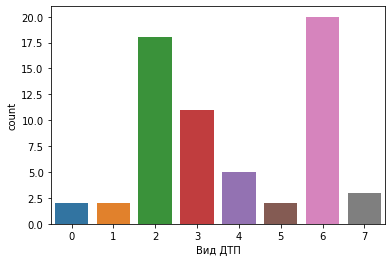

In [17]:
sns.countplot(x = "Вид ДТП" , data  = df)  

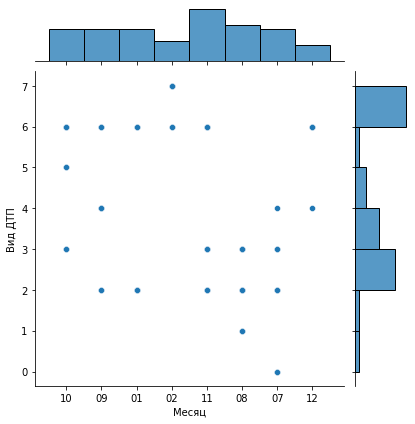

In [18]:
sns.jointplot(x = 'Месяц', y = "Вид ДТП" , data = df)

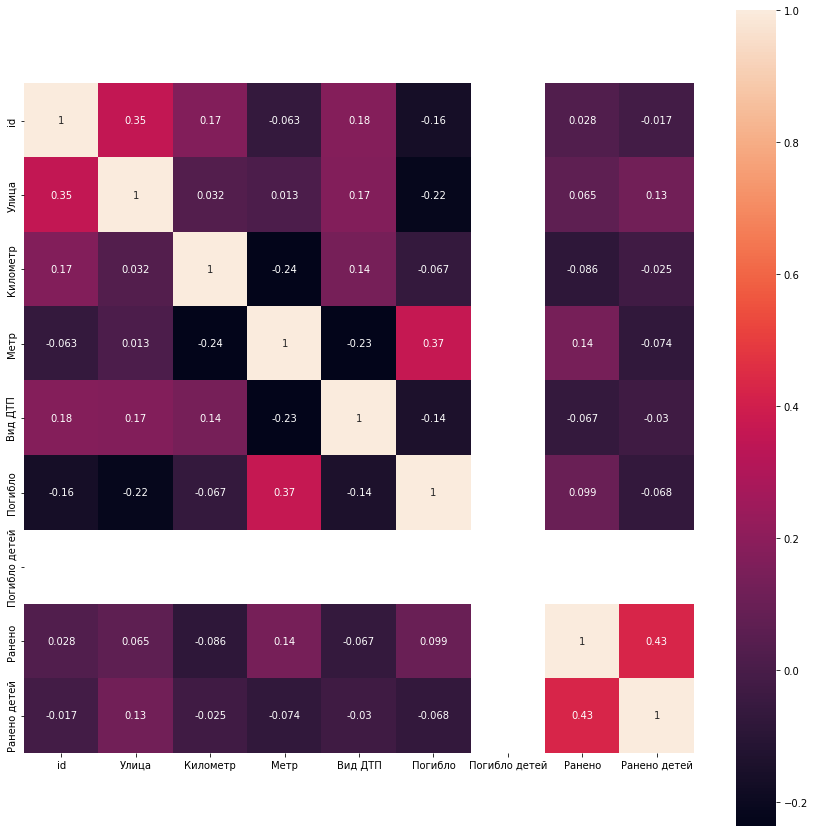

In [19]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [20]:
df["День"] = df["День"].astype('int')
df["Месяц"] = df["Месяц"].astype('int')
df["Час"] = df["Час"].astype('int')

заменим наны на медиану

In [21]:
# df['Километр'] = df['Километр'].fillna(df['Километр'].median())
# df['Метр'] = df['Метр'].fillna(df['Метр'].median())

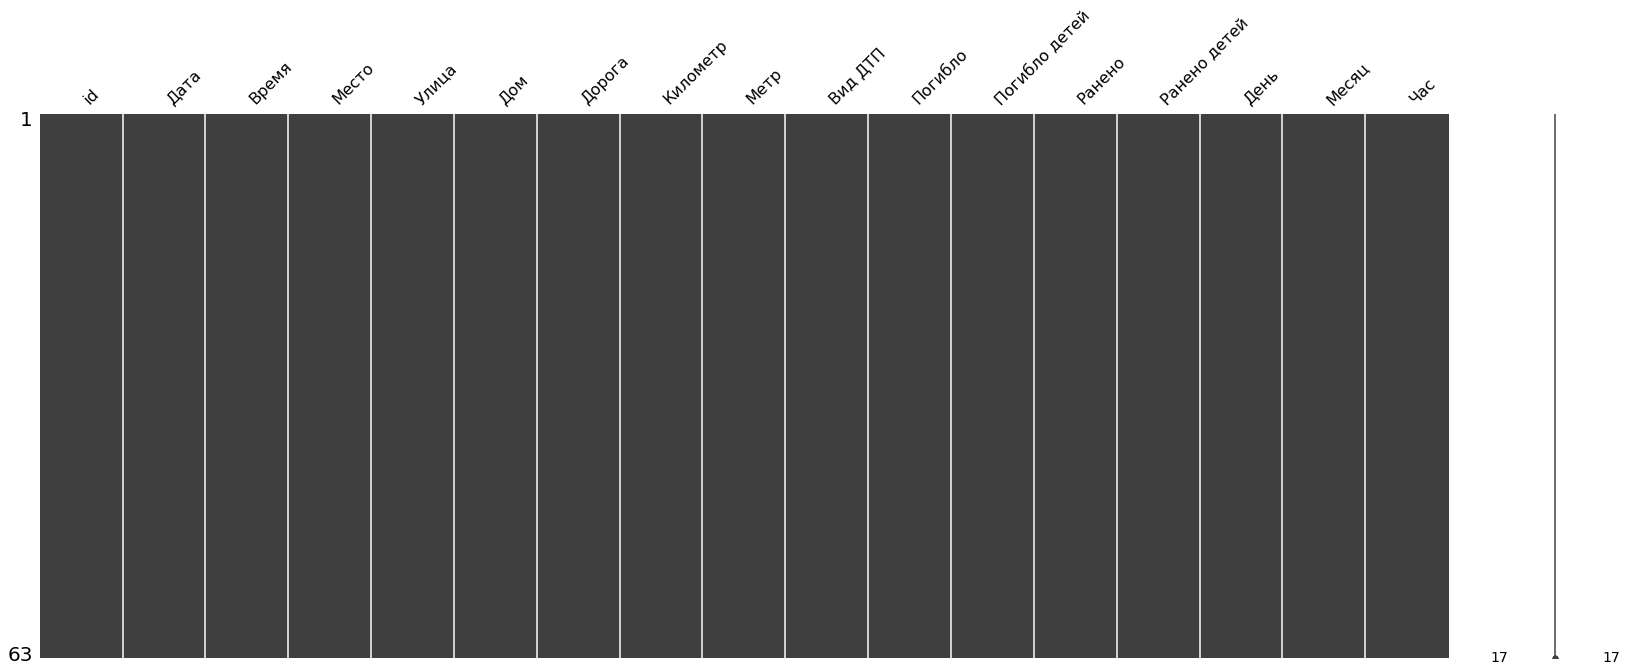

In [22]:
msno.matrix(df, figsize = (28,10))

In [23]:
X = df.drop(["Дата", "Время","Место","Дорога", "Дом", "id", "Погибло",	"Погибло детей",	"Ранено",	"Ранено детей"], axis = 1)
y = df[["Погибло",	"Погибло детей",	"Ранено",	"Ранено детей"]]

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1464 to 34135
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Улица     63 non-null     int8   
 1   Километр  63 non-null     float64
 2   Метр      63 non-null     float64
 3   Вид ДТП   63 non-null     int8   
 4   День      63 non-null     int64  
 5   Месяц     63 non-null     int64  
 6   Час       63 non-null     int64  
dtypes: float64(2), int64(3), int8(2)
memory usage: 5.1 KB


In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

*RFC*

In [26]:
clf = RandomForestClassifier(random_state=0)

In [27]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

*SGD*

In [28]:
# sgd = SGDClassifier()
# model_1 = sgd.fit(X_train, y_train['Погибло'])
# model_2 = sgd.fit(X_train, y_train['Погибло детей'])
# model_3 = sgd.fit(X_train, y_train['Ранено'])
# model_4 = sgd.fit(X_train, y_train['Ранено детей'])

*RFC с подбором параметров*

In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.metrics import recall_score

In [32]:
f = ['auto', 'sqrt', 'log2']
best_result = 0
best_model = None
for depth in range(1, 30):
    for estimators in range (1, 5):
        for features in f:
            model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, max_features=features, random_state=12345)
            model.fit(X_train, y_train)
            pred = model.predict(X_valid)
            score = 0 
            score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
            score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
            score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
            score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')
            result = score/4
            if result > best_result:
                best_result = result
                best_model = model
print(best_result)
print(best_model)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

0.7958333333333334
RandomForestClassifier(max_depth=1, n_estimators=4, random_state=12345)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

*DTR*

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

*DTR с параметрами*

In [35]:
best_result = 0
best_model = None
for depth in range(1, 300):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    score = 0 
    score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
    score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
    score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
    score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')
    result = score/4
    if result > best_result:
        best_result = result
        best_model = model
print(best_result)
print(best_model)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

0.7958333333333334
DecisionTreeClassifier(max_depth=1, random_state=12345)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Оценка точности

*RFC*

In [36]:
pred = clf.predict(X_valid)

In [37]:
from sklearn.metrics import recall_score

score = 0 

score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print("Recall score:", score/4)

Recall score: 0.7495370370370371


*RFC с параметрами*

In [39]:
pred = best_model.predict(X_valid)

In [40]:
score = 0 

score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')

In [41]:
print("Recall score:", score/4)

Recall score: 0.7958333333333334


*DTR*

In [42]:
pred = dtr.predict(X_valid)
score = 0 
score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')
print("Recall score:", score/4)

Recall score: 0.7412037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*SGD*

In [43]:
# pred = lr.predict(X_valid)
# y_valid

In [44]:
# from sklearn.metrics import recall_score

# score = 0 

# score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
# score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
# score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
# score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')

# Текст

In [45]:
test_1 = pd.read_csv('/content/drive/MyDrive/Хакатоны/Дагестан ДТП/test_dataset_test (1).csv')

In [46]:
test = test_1

In [47]:
test["День"] = test["Дата"].str[:2]
test["Месяц"] = test["Дата"].str[3:5]
test["Час"] = test["Время"].str[:2]

In [48]:
test["Вид ДТП"] = pd.Categorical(test["Вид ДТП"])
test["Вид ДТП"].astype('category').cat.codes
test["Вид ДТП"] = test["Вид ДТП"].cat.codes

In [49]:
test["Улица"] = pd.Categorical(test["Улица"])
test["Улица"].astype('category').cat.codes
test["Улица"] = test["Улица"].cat.codes

In [50]:
test["День"] = test["День"].astype('int')
test["Месяц"] = test["Месяц"].astype('int')
test["Час"] = test["Час"].astype('int')

In [51]:
test = test.drop(["Дата", "Время","Место","Дорога", "Дом", "id"], axis = 1)


In [52]:
test = test.fillna(0)

*Тест RFC*

In [53]:
pred = clf.predict(test)
w = pd.DataFrame(columns=['Погибло',	'Погибло детей',	'Ранено',	'Ранено детей'], data = pred, index=test_1['id'])
w.rename_axis('id').reset_index()
w.to_csv('./rfc.csv')

*RFC тест с параметрами*

In [54]:
pred = best_model.predict(test)
w = pd.DataFrame(columns=['Погибло',	'Погибло детей',	'Ранено',	'Ранено детей'], data = pred, index=test_1['id'])
w.rename_axis('id').reset_index()
w.to_csv('./rfc_p.csv')